In [2]:
%pip install autots

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 674 kB 29.3 MB/s 


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from autots import AutoTS
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv('AAPL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-05-03,132.039993,134.070007,131.830002,132.539993,131.756897,75135100
1,2021-05-04,131.190002,131.490005,126.699997,127.849998,127.094612,137564700
2,2021-05-05,129.199997,130.449997,127.970001,128.100006,127.343140,84000900
3,2021-05-06,127.889999,129.750000,127.129997,129.740005,128.973465,78128300
4,2021-05-07,130.850006,131.259995,129.479996,130.210007,129.660553,78973300


In [5]:
df1=df[['Date','Close']]
df1.head()

,Date,Close
0,2021-05-03,132.539993
1,2021-05-04,127.849998
2,2021-05-05,128.100006
3,2021-05-06,129.740005
4,2021-05-07,130.210007


In [6]:
correlation = df.corr()
print(correlation["Close"].sort_values(ascending=False))

Close        1.000000
Adj Close    0.999963
Low          0.995383
High         0.995246
Open         0.989744
Volume       0.258599
Name: Close, dtype: float64


In [7]:
df1["Date"] = pd.to_datetime(df1.Date)

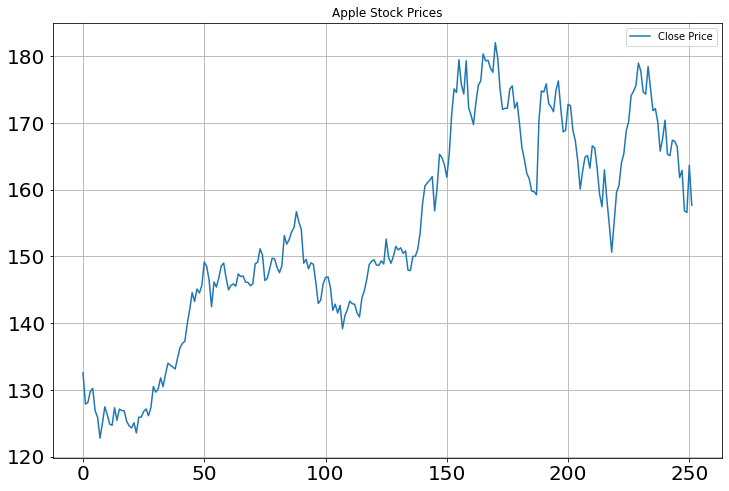

In [8]:
df1["Close"].plot(figsize=(12, 8), title="Apple Stock Prices", fontsize=20, label="Close Price")
plt.legend()
plt.grid()
plt.show()

In [9]:
model = AutoTS(forecast_length=10, frequency='infer', 
               ensemble='simple', drop_data_older_than_periods=200,max_generations=5,validation_method="backwards")
model = model.fit(df1, date_col='Date', value_col='Close', id_col=None)

Inferred frequency is: B
Old data dropped by `drop_data_older_than_periods`.
Model Number: 1 with model ARIMA in generation 0 of 5
Model Number: 2 with model ARIMA in generation 0 of 5
Model Number: 3 with model ARIMA in generation 0 of 5
Model Number: 4 with model AverageValueNaive in generation 0 of 5
Model Number: 5 with model AverageValueNaive in generation 0 of 5
Model Number: 6 with model AverageValueNaive in generation 0 of 5
Model Number: 7 with model DatepartRegression in generation 0 of 5
Model Number: 8 with model DatepartRegression in generation 0 of 5
Model Number: 9 with model DatepartRegression in generation 0 of 5
Model Number: 10 with model DatepartRegression in generation 0 of 5
Epoch 1/50
6/6 [==============================] - 6s 5ms/step - loss: 0.3830
Epoch 2/50
6/6 [==============================] - 0s 5ms/step - loss: 0.3794
Epoch 3/50
6/6 [==============================] - 0s 5ms/step - loss: 0.3699
Epoch 4/50
6/6 [==============================] - 0s 5ms/step -

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp11_dwuur/a9ywlrtc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp11_dwuur/b7zt4bya.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43230', 'data', 'file=/tmp/tmp11_dwuur/a9ywlrtc.json', 'init=/tmp/tmp11_dwuur/b7zt4bya.json', 'output', 'file=/tmp/tmp11_dwuur/prophet_modeldthh33yc/prophet_model-20221223063403.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:34:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:34:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 39 with model GluonTS in generation 0 of 5
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 39: GluonTS
Model Number: 40 with model MultivariateRegression in generation 0 of 5


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 41 with model MultivariateRegression in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 41: MultivariateRegression
Model Number: 42 with model DatepartRegression in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 42: DatepartRegression
Model Number: 43 with model SeasonalNaive in generation 0 of 5
Model Number: 44 with model DatepartRegression in generation 0 of 5
Model Number: 45 with model UnobservedComponents in generation 0 of 5
Model Number: 46 with model UnobservedComponents in generation 0 of 5
Model Number: 47 with model ETS in generation 0 of 5
Model Number: 48 with model VECM in generation 0 of 5
Template Eval Error: ValueError('Only gave one variable to VECM') in model 48: VECM
Model Number: 49 with model ARDL in generation 0 of 5
Template Eval Error: ImportError("cannot import name 'ARDL' from 'statsmodels.tsa.api' (/usr/l

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp11_dwuur/w2if7vq_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp11_dwuur/ecrx5oc7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62827', 'data', 'file=/tmp/tmp11_dwuur/w2if7vq_.json', 'init=/tmp/tmp11_dwuur/ecrx5oc7.json', 'output', 'file=/tmp/tmp11_dwuur/prophet_modelc_rmlee_/prophet_model-20221223063406.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:34:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 57 with model FBProphet in generation 0 of 5


06:34:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 58 with model SeasonalNaive in generation 0 of 5
Model Number: 59 with model DatepartRegression in generation 0 of 5


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 60 with model NVAR in generation 0 of 5
Model Number: 61 with model Theta in generation 0 of 5
Model Number: 62 with model UnivariateRegression in generation 0 of 5
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float32').") in model 62: UnivariateRegression
Model Number: 63 with model ARCH in generation 0 of 5
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 63: ARCH
Model Number: 64 with model ConstantNaive in generation 0 of 5
Model Number: 65 with model LastValueNaive in generation 0 of 5
Model Number: 66 with model AverageValueNaive in generation 0 of 5
Model Number: 67 with model GLS in generation 0 of 5
Model Number: 68 with model SeasonalNaive in generation 0 of 5
Model Number: 69 with model GLM in generation 0 of 5
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 69: GLM
Model Number: 70 with model ETS in generation 0 of 5
ETS error 

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 71 with model FBProphet in generation 0 of 5


DEBUG:cmdstanpy:input tempfile: /tmp/tmp11_dwuur/a5vbkckc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp11_dwuur/pix1k551.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93867', 'data', 'file=/tmp/tmp11_dwuur/a5vbkckc.json', 'init=/tmp/tmp11_dwuur/pix1k551.json', 'output', 'file=/tmp/tmp11_dwuur/prophet_modelmzhk37xt/prophet_model-20221223063407.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:34:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:34:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 72 with model GluonTS in generation 0 of 5
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 72: GluonTS
Model Number: 73 with model UnobservedComponents in generation 0 of 5
Model Number: 74 with model VAR in generation 0 of 5
No anomalies detected.
Template Eval Error: ValueError('Only gave one variable to VAR') in model 74: VAR
Model Number: 75 with model VECM in generation 0 of 5
Template Eval Error: ValueError('Only gave one variable to VECM') in model 75: VECM
Model Number: 76 with model ARIMA in generation 0 of 5
Model Number: 77 with model WindowRegression in generation 0 of 5
Model Number: 78 with model DatepartRegression in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 78: DatepartRegression
Model Number: 79 with model UnivariateRegression in generation 0 of 5
Template Eval Error: ValueError("Input contains NaN, infini

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp11_dwuur/da5yct6x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp11_dwuur/5j7b6555.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76118', 'data', 'file=/tmp/tmp11_dwuur/da5yct6x.json', 'init=/tmp/tmp11_dwuur/5j7b6555.json', 'output', 'file=/tmp/tmp11_dwuur/prophet_modeln1pk9f6o/prophet_model-20221223063414.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:34:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:34:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 113 with model SeasonalNaive in generation 0 of 5
Model Number: 114 with model ETS in generation 0 of 5
Model Number: 115 with model VAR in generation 0 of 5
Template Eval Error: ValueError('Only gave one variable to VAR') in model 115: VAR
Model Number: 116 with model MultivariateMotif in generation 0 of 5
Model Number: 117 with model GLM in generation 0 of 5
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 117: GLM
Model Number: 118 with model VECM in generation 0 of 5
Template Eval Error: ValueError('Only gave one variable to VECM') in model 118: VECM
Model Number: 119 with model LastValueNaive in generation 0 of 5
Model Number: 120 with model ARCH in generation 0 of 5
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 120: ARCH
Model Number: 121 with model MultivariateMotif in generation 0 of 5
Model Number: 122 with model 

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp11_dwuur/dev7p4_q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp11_dwuur/vkepw9px.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41968', 'data', 'file=/tmp/tmp11_dwuur/dev7p4_q.json', 'init=/tmp/tmp11_dwuur/vkepw9px.json', 'output', 'file=/tmp/tmp11_dwuur/prophet_modelwmfgv0hk/prophet_model-20221223063429.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:34:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 219 with model FBProphet in generation 1 of 5


06:34:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 220 with model UnivariateRegression in generation 1 of 5
Model Number: 221 with model SectionalMotif in generation 1 of 5
Model Number: 222 with model GLM in generation 1 of 5
Model Number: 223 with model LastValueNaive in generation 1 of 5
Model Number: 224 with model ETS in generation 1 of 5
ETS failed on Close with ValueError('could not broadcast input array from shape (190,) into shape (364,)')
Model Number: 225 with model SectionalMotif in generation 1 of 5
Model Number: 226 with model GLS in generation 1 of 5
Model Number: 227 with model Theta in generation 1 of 5
Model Number: 228 with model MultivariateMotif in generation 1 of 5


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp11_dwuur/2nl5s0je.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp11_dwuur/i55eb4r6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98869', 'data', 'file=/tmp/tmp11_dwuur/2nl5s0je.json', 'init=/tmp/tmp11_dwuur/i55eb4r6.json', 'output', 'file=/tmp/tmp11_dwuur/prophet_modellce6noc0/prophet_model-20221223063431.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:34:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:34:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 229 with model FBProphet in generation 1 of 5
Model Number: 230 with model GLM in generation 1 of 5
Model Number: 231 with model SeasonalNaive in generation 1 of 5
Model Number: 232 with model UnivariateMotif in generation 1 of 5
Model Number: 233 with model WindowRegression in generation 1 of 5
Model Number: 234 with model DatepartRegression in generation 1 of 5
Model Number: 235 with model WindowRegression in generation 1 of 5
Model Number: 236 with model UnivariateMotif in generation 1 of 5
Model Number: 237 with model GLS in generation 1 of 5
Model Number: 238 with model LastValueNaive in generation 1 of 5
Model Number: 239 with model ARIMA in generation 1 of 5
Model Number: 240 with model DatepartRegression in generation 1 of 5
Epoch 1/50
23/23 [==============================] - 4s 5ms/step - loss: 12.3044
Epoch 2/50
23/23 [==============================] - 0s 3ms/step - loss: 12.2633
Epoch 3/50
23/23 [==============================] - 0s 3ms/step - loss: 12.1760
Epo

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 249 with model MultivariateMotif in generation 1 of 5


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 250 with model DatepartRegression in generation 1 of 5
Epoch 1/50
6/6 [==============================] - 5s 5ms/step - loss: 0.3827
Epoch 2/50
6/6 [==============================] - 0s 5ms/step - loss: 0.3785
Epoch 3/50
6/6 [==============================] - 0s 5ms/step - loss: 0.3694
Epoch 4/50
6/6 [==============================] - 0s 5ms/step - loss: 0.3637
Epoch 5/50
6/6 [==============================] - 0s 5ms/step - loss: 0.3564
Epoch 6/50
6/6 [==============================] - 0s 6ms/step - loss: 0.3502
Epoch 7/50
6/6 [==============================] - 0s 5ms/step - loss: 0.3384
Epoch 8/50
6/6 [==============================] - 0s 7ms/step - loss: 0.3310
Epoch 9/50
6/6 [==============================] - 0s 6ms/step - loss: 0.3270
Epoch 10/50
6/6 [==============================] - 0s 5ms/step - loss: 0.3210
Epoch 11/50
6/6 [==============================] - 0s 7ms/step - loss: 0.3165
Epoch 12/50
6/6 [==============================] - 0s 5ms/step - loss: 0.3165
Epoc

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp11_dwuur/cee09ix4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp11_dwuur/z7bo5rmt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60725', 'data', 'file=/tmp/tmp11_dwuur/cee09ix4.json', 'init=/tmp/tmp11_dwuur/z7bo5rmt.json', 'output', 'file=/tmp/tmp11_dwuur/prophet_modelw8zg7xa5/prophet_model-20221223063530.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:35:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 315 with model FBProphet in generation 2 of 5


06:35:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 316 with model UnivariateMotif in generation 2 of 5
Model Number: 317 with model AverageValueNaive in generation 2 of 5
Model Number: 318 with model ETS in generation 2 of 5
ETS failed on Close with ValueError('could not broadcast input array from shape (190,) into shape (364,)')
Model Number: 319 with model NVAR in generation 2 of 5
Model Number: 320 with model SectionalMotif in generation 2 of 5
Model Number: 321 with model MultivariateMotif in generation 2 of 5
Model Number: 322 with model MultivariateMotif in generation 2 of 5
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'zero', 'transformations': {'0': 'QuantileTransformer', '1': 'AlignLastValue', '2': 'AlignLastValue'}, 'transformation_params': {'0': {'output_distribution': 'uniform', 'n_quantiles': 100}, '1': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp11_dwuur/ixhfxe1c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp11_dwuur/kv8tvp3q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98107', 'data', 'file=/tmp/tmp11_dwuur/ixhfxe1c.json', 'init=/tmp/tmp11_dwuur/kv8tvp3q.json', 'output', 'file=/tmp/tmp11_dwuur/prophet_model0dj7kfu1/prophet_model-20221223063540.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:35:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 369 with model FBProphet in generation 2 of 5


06:35:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 370 with model ARIMA in generation 2 of 5
Model Number: 371 with model AverageValueNaive in generation 2 of 5
Model Number: 372 with model Theta in generation 2 of 5
Model Number: 373 with model ETS in generation 2 of 5
ETS failed on Close with ValueError('could not broadcast input array from shape (184,) into shape (420,)')
Model Number: 374 with model ARIMA in generation 2 of 5
Model Number: 375 with model UnobservedComponents in generation 2 of 5
Model Number: 376 with model MultivariateMotif in generation 2 of 5
Model Number: 377 with model UnobservedComponents in generation 2 of 5
Model Number: 378 with model AverageValueNaive in generation 2 of 5
Model Number: 379 with model LastValueNaive in generation 2 of 5
Model Number: 380 with model SeasonalNaive in generation 2 of 5
Model Number: 381 with model UnobservedComponents in generation 2 of 5
Model Number: 382 with model NVAR in generation 2 of 5
Model Number: 383 with model MultivariateRegression in generation 2 of

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp11_dwuur/1owr9n7q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp11_dwuur/f6pix8_p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2170', 'data', 'file=/tmp/tmp11_dwuur/1owr9n7q.json', 'init=/tmp/tmp11_dwuur/f6pix8_p.json', 'output', 'file=/tmp/tmp11_dwuur/prophet_model3rumfqra/prophet_model-20221223063552.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:35:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:35:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Template Eval Error: Exception('Transformer DatepartRegression failed on inverse') in model 418: FBProphet
Model Number: 419 with model MultivariateMotif in generation 2 of 5
Model Number: 420 with model SectionalMotif in generation 2 of 5
Model Number: 421 with model LastValueNaive in generation 2 of 5
Model Number: 422 with model UnivariateMotif in generation 2 of 5
Model Number: 423 with model LastValueNaive in generation 2 of 5
Model Number: 424 with model UnobservedComponents in generation 2 of 5
Model Number: 425 with model NVAR in generation 2 of 5
Model Number: 426 with model LastValueNaive in generation 2 of 5
Model Number: 427 with model UnivariateMotif in generation 2 of 5
Model Number: 428 with model UnivariateMotif in generation 2 of 5
Model Number: 429 with model AverageValueNaive in generation 2 of 5
Model Number: 430 with model DatepartRegression in generation 2 of 5
Epoch 1/50
6/6 [==============================] - 5s 13ms/step - loss: nan
Epoch 2/50
6/6 [=============

1/1 [==============================] - 1s 1s/step
Model Number: 541 with model UnivariateMotif in generation 3 of 5
Model Number: 542 with model UnivariateMotif in generation 3 of 5
Model Number: 543 with model ETS in generation 3 of 5
ETS failed on Close with ValueError('could not broadcast input array from shape (190,) into shape (420,)')
Model Number: 544 with model WindowRegression in generation 3 of 5
Model Number: 545 with model UnobservedComponents in generation 3 of 5
Model Number: 546 with model GLS in generation 3 of 5
Model Number: 547 with model WindowRegression in generation 3 of 5
Model Number: 548 with model ARIMA in generation 3 of 5
Model Number: 549 with model NVAR in generation 3 of 5
Model Number: 550 with model UnobservedComponents in generation 3 of 5
Model Number: 551 with model MultivariateRegression in generation 3 of 5
Model Number: 552 with model ARIMA in generation 3 of 5
Model Number: 553 with model MultivariateRegression in generation 3 of 5
Model Number: 

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp11_dwuur/y9nt5bdq.json


Model Number: 560 with model FBProphet in generation 3 of 5


DEBUG:cmdstanpy:input tempfile: /tmp/tmp11_dwuur/d7rxfqae.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15967', 'data', 'file=/tmp/tmp11_dwuur/y9nt5bdq.json', 'init=/tmp/tmp11_dwuur/d7rxfqae.json', 'output', 'file=/tmp/tmp11_dwuur/prophet_modeleiuz3wrl/prophet_model-20221223063719.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:37:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:37:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 561 with model GLS in generation 3 of 5
Model Number: 562 with model UnivariateMotif in generation 3 of 5
Model Number: 563 with model ARIMA in generation 3 of 5
New Generation: 4 of 5
Model Number: 564 with model ConstantNaive in generation 4 of 5
Model Number: 565 with model GLS in generation 4 of 5
Model Number: 566 with model ConstantNaive in generation 4 of 5
Model Number: 567 with model SectionalMotif in generation 4 of 5
Model Number: 568 with model MultivariateMotif in generation 4 of 5
Model Number: 569 with model AverageValueNaive in generation 4 of 5
Model Number: 570 with model MultivariateRegression in generation 4 of 5
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 570: MultivariateRegression
Model Number: 571 with model SeasonalNaive in generation 4 of 5
Model Number: 572 with model LastValueNaive in generation 4 of 5
Model Number: 573 with model ARIMA in generation 4 of 5
Model Number: 574 with model SectionalMotif in generation 

1/1 [==============================] - 2s 2s/step
Model Number: 605 with model MultivariateMotif in generation 4 of 5
Model Number: 606 with model ETS in generation 4 of 5
ETS error ValueError('Can only dampen the trend component')
ETS failed on Close with ValueError('Can only dampen the trend component')
Model Number: 607 with model SeasonalNaive in generation 4 of 5
Model Number: 608 with model DatepartRegression in generation 4 of 5
Model Number: 609 with model MultivariateMotif in generation 4 of 5
Model Number: 610 with model Theta in generation 4 of 5
Model Number: 611 with model MultivariateRegression in generation 4 of 5
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 611: MultivariateRegression
Model Number: 612 with model MultivariateMotif in generation 4 of 5
Model Number: 613 with model ARIMA in generation 4 of 5
Model Number: 614 with model LastValueNaive in generation 4 of 5
Model Number: 615 with model ETS in generati

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 647 with model FBProphet in generation 4 of 5


DEBUG:cmdstanpy:input tempfile: /tmp/tmp11_dwuur/4not2vdg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp11_dwuur/0q8yid_e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35149', 'data', 'file=/tmp/tmp11_dwuur/4not2vdg.json', 'init=/tmp/tmp11_dwuur/0q8yid_e.json', 'output', 'file=/tmp/tmp11_dwuur/prophet_model894wnwzs/prophet_model-20221223063824.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:38:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:38:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 648 with model SeasonalNaive in generation 4 of 5
Model Number: 649 with model LastValueNaive in generation 4 of 5
Model Number: 650 with model UnobservedComponents in generation 4 of 5
Model Number: 651 with model MultivariateRegression in generation 4 of 5
Model Number: 652 with model SectionalMotif in generation 4 of 5
Model Number: 653 with model UnobservedComponents in generation 4 of 5
Model Number: 654 with model LastValueNaive in generation 4 of 5
Model Number: 655 with model SeasonalNaive in generation 4 of 5
Model Number: 656 with model ETS in generation 4 of 5
Model Number: 657 with model GLM in generation 4 of 5
Model Number: 658 with model AverageValueNaive in generation 4 of 5
Model Number: 659 with model GLS in generation 4 of 5
Model Number: 660 with model UnobservedComponents in generation 4 of 5
Model Number: 661 with model DatepartRegression in generation 4 of 5
Epoch 1/50
5/5 [==============================] - 8s 383ms/step - loss: 6349283.5000 - val_l

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp11_dwuur/jmk96dzx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp11_dwuur/rbaw5adt.json
DEBUG:cmdstanpy:idx 0


Model Number: 672 with model FBProphet in generation 4 of 5


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24199', 'data', 'file=/tmp/tmp11_dwuur/jmk96dzx.json', 'init=/tmp/tmp11_dwuur/rbaw5adt.json', 'output', 'file=/tmp/tmp11_dwuur/prophet_modelv634n414/prophet_model-20221223063914.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:39:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:39:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 673 with model SeasonalNaive in generation 4 of 5
Model Number: 674 with model NVAR in generation 4 of 5
Model Number: 675 with model Theta in generation 4 of 5
Model Number: 676 with model NVAR in generation 4 of 5
Model Number: 677 with model GLS in generation 4 of 5
Model Number: 678 with model SectionalMotif in generation 4 of 5
Model Number: 679 with model SeasonalNaive in generation 4 of 5
Model Number: 680 with model LastValueNaive in generation 4 of 5
Model Number: 681 with model ETS in generation 4 of 5
Model Number: 682 with model FBProphet in generation 4 of 5


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp11_dwuur/s5a1tfkm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp11_dwuur/1yqeq6si.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36923', 'data', 'file=/tmp/tmp11_dwuur/s5a1tfkm.json', 'init=/tmp/tmp11_dwuur/1yqeq6si.json', 'output', 'file=/tmp/tmp11_dwuur/prophet_models6f686jg/prophet_model-20221223063918.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:39:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:39:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 683 with model NVAR in generation 4 of 5
Model Number: 684 with model UnivariateMotif in generation 4 of 5
Model Number: 685 with model SectionalMotif in generation 4 of 5
Model Number: 686 with model UnivariateMotif in generation 4 of 5
Model Number: 687 with model MetricMotif in generation 4 of 5
Model Number: 688 with model Theta in generation 4 of 5
New Generation: 5 of 5
Model Number: 689 with model MultivariateRegression in generation 5 of 5
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 689: MultivariateRegression
Model Number: 690 with model SectionalMotif in generation 5 of 5
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 690: SectionalMotif
Model Number: 691 with model MultivariateMotif in generation 5 of 5
Model Number: 692 with model AverageValueNaive in generation 5 of 5
Model Number: 693 with model UnivariateMotif in generation 5 of 5
Model Number: 694 with model Season

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 710 with model FBProphet in generation 5 of 5


DEBUG:cmdstanpy:input tempfile: /tmp/tmp11_dwuur/ubt1num_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp11_dwuur/l9w5ndgx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56724', 'data', 'file=/tmp/tmp11_dwuur/ubt1num_.json', 'init=/tmp/tmp11_dwuur/l9w5ndgx.json', 'output', 'file=/tmp/tmp11_dwuur/prophet_modelzual2fvt/prophet_model-20221223063921.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:39:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:39:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 711 with model GLM in generation 5 of 5
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 711: GLM
Model Number: 712 with model ETS in generation 5 of 5
ETS failed on Close with ValueError('could not broadcast input array from shape (190,) into shape (364,)')
Model Number: 713 with model ConstantNaive in generation 5 of 5
Model Number: 714 with model ETS in generation 5 of 5
Model Number: 715 with model GLS in generation 5 of 5
Model Number: 716 with model Theta in generation 5 of 5
Model Number: 717 with model Theta in generation 5 of 5
Model Number: 718 with model UnivariateMotif in generation 5 of 5
Model Number: 719 with model ETS in generation 5 of 5
Model Number: 720 with model UnobservedComponents in generation 5 of 5
Model Number: 721 with model UnivariateMotif in generation 5 of 5
Model Number: 722 with model UnivariateMotif in generation 5 of 5
Model Num

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp11_dwuur/0qcwf0nj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp11_dwuur/ozn1u5yv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63540', 'data', 'file=/tmp/tmp11_dwuur/0qcwf0nj.json', 'init=/tmp/tmp11_dwuur/ozn1u5yv.json', 'output', 'file=/tmp/tmp11_dwuur/prophet_modelcpef9jvw/prophet_model-20221223064155.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:41:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


105 - MetricMotif with avg smape 2.09: 
Model Number: 106 of 119 with model FBProphet for Validation 1


06:41:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp11_dwuur/068o5pj3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp11_dwuur/09jfw0b2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37005', 'data', 'file=/tmp/tmp11_dwuur/068o5pj3.json', 'init=/tmp/tmp11_dwuur/09jfw0b2.json', 'output', 'file=/tmp/tmp11_dwuur/prophet_modelvhspse21/prophet_model-20221223064156.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:41:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:41:56 - cmdstanpy - INFO - Chain [1] d

106 - FBProphet with avg smape 2.74: 
Model Number: 107 of 119 with model FBProphet for Validation 1
107 - FBProphet with avg smape 2.71: 
Model Number: 108 of 119 with model WindowRegression for Validation 1
108 - WindowRegression with avg smape 1.91: 
Model Number: 109 of 119 with model GLM for Validation 1
109 - GLM with avg smape 7.11: 
Model Number: 110 of 119 with model MetricMotif for Validation 1
110 - MetricMotif with avg smape 2.71: 
Model Number: 111 of 119 with model GLM for Validation 1
111 - GLM with avg smape 7.04: 
Model Number: 112 of 119 with model MetricMotif for Validation 1
112 - MetricMotif with avg smape 1.79: 
Model Number: 113 of 119 with model ConstantNaive for Validation 1
113 - ConstantNaive with avg smape 2.29: 
Model Number: 114 of 119 with model GLM for Validation 1
114 - GLM with avg smape 4.11: 
Model Number: 115 of 119 with model ConstantNaive for Validation 1
115 - ConstantNaive with avg smape 7.16: 
Model Number: 116 of 119 with model ConstantNaive f

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp11_dwuur/g6vr1nk5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp11_dwuur/tugcxodi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11608', 'data', 'file=/tmp/tmp11_dwuur/g6vr1nk5.json', 'init=/tmp/tmp11_dwuur/tugcxodi.json', 'output', 'file=/tmp/tmp11_dwuur/prophet_modelh08tzi9a/prophet_model-20221223064157.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:41:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:41:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


117 - FBProphet with avg smape 16.6: 
Model Number: 118 of 119 with model ConstantNaive for Validation 1


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp11_dwuur/oad8a9tc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp11_dwuur/h0kf3n_e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53179', 'data', 'file=/tmp/tmp11_dwuur/oad8a9tc.json', 'init=/tmp/tmp11_dwuur/h0kf3n_e.json', 'output', 'file=/tmp/tmp11_dwuur/prophet_models_u73z9k/prophet_model-20221223064158.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:41:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:41:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


118 - ConstantNaive with avg smape 2.81: 
Model Number: 119 of 119 with model FBProphet for Validation 1
119 - FBProphet with avg smape 2.0: 
Validation Round: 2
Model Number: 1 of 119 with model Ensemble for Validation 2
📈 1 - Ensemble with avg smape 7.29: 
Model Number: 2 of 119 with model Ensemble for Validation 2
📈 2 - Ensemble with avg smape 7.19: 
Model Number: 3 of 119 with model Ensemble for Validation 2
3 - Ensemble with avg smape 7.8: 
Model Number: 4 of 119 with model NVAR for Validation 2
4 - NVAR with avg smape 7.28: 
Model Number: 5 of 119 with model NVAR for Validation 2
5 - NVAR with avg smape 7.28: 
Model Number: 6 of 119 with model NVAR for Validation 2
6 - NVAR with avg smape 7.3: 
Model Number: 7 of 119 with model NVAR for Validation 2
📈 7 - NVAR with avg smape 6.48: 
Model Number: 8 of 119 with model Ensemble for Validation 2
8 - Ensemble with avg smape 7.19: 
Model Number: 9 of 119 with model Ensemble for Validation 2
9 - Ensemble with avg smape 7.18: 
Model Numbe

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


105 - MetricMotif with avg smape 7.22: 
Model Number: 106 of 119 with model FBProphet for Validation 2


DEBUG:cmdstanpy:input tempfile: /tmp/tmp11_dwuur/m9y8m2mp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp11_dwuur/zs1kox3o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33793', 'data', 'file=/tmp/tmp11_dwuur/m9y8m2mp.json', 'init=/tmp/tmp11_dwuur/zs1kox3o.json', 'output', 'file=/tmp/tmp11_dwuur/prophet_modelpj1_6czk/prophet_model-20221223064433.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:44:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:44:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp

106 - FBProphet with avg smape 9.71: 
Model Number: 107 of 119 with model FBProphet for Validation 2
107 - FBProphet with avg smape 5.58: 
Model Number: 108 of 119 with model WindowRegression for Validation 2
📈 108 - WindowRegression with avg smape 2.08: 
Model Number: 109 of 119 with model GLM for Validation 2
109 - GLM with avg smape 10.03: 
Model Number: 110 of 119 with model MetricMotif for Validation 2
110 - MetricMotif with avg smape 5.58: 
Model Number: 111 of 119 with model GLM for Validation 2
111 - GLM with avg smape 9.15: 
Model Number: 112 of 119 with model MetricMotif for Validation 2
112 - MetricMotif with avg smape 6.09: 
Model Number: 113 of 119 with model ConstantNaive for Validation 2
113 - ConstantNaive with avg smape 4.64: 
Model Number: 114 of 119 with model GLM for Validation 2
114 - GLM with avg smape 5.62: 
Model Number: 115 of 119 with model ConstantNaive for Validation 2
115 - ConstantNaive with avg smape 8.09: 
Model Number: 116 of 119 with model ConstantNaiv

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp11_dwuur/whb57jrd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp11_dwuur/pfam0scp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68633', 'data', 'file=/tmp/tmp11_dwuur/whb57jrd.json', 'init=/tmp/tmp11_dwuur/pfam0scp.json', 'output', 'file=/tmp/tmp11_dwuur/prophet_modeleguvijel/prophet_model-20221223064436.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:44:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:44:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


117 - FBProphet with avg smape 8.65: 
Model Number: 118 of 119 with model ConstantNaive for Validation 2


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp11_dwuur/jxhfdq40.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp11_dwuur/85i7nm13.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46537', 'data', 'file=/tmp/tmp11_dwuur/jxhfdq40.json', 'init=/tmp/tmp11_dwuur/85i7nm13.json', 'output', 'file=/tmp/tmp11_dwuur/prophet_model1i837c9t/prophet_model-20221223064437.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:44:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:44:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


118 - ConstantNaive with avg smape 7.65: 
Model Number: 119 of 119 with model FBProphet for Validation 2
119 - FBProphet with avg smape 6.93: 
Validation Round: 3
Model Number: 1 of 119 with model Ensemble for Validation 3
📈 1 - Ensemble with avg smape 66.84: 
Model Number: 2 of 119 with model Ensemble for Validation 3
📈 2 - Ensemble with avg smape 4.18: 
Model Number: 3 of 119 with model Ensemble for Validation 3
📈 3 - Ensemble with avg smape 3.88: 
Model Number: 4 of 119 with model NVAR for Validation 3
4 - NVAR with avg smape 70.15: 
Model Number: 5 of 119 with model NVAR for Validation 3
5 - NVAR with avg smape 70.09: 
Model Number: 6 of 119 with model NVAR for Validation 3
📈 6 - NVAR with avg smape 3.54: 
Model Number: 7 of 119 with model NVAR for Validation 3
7 - NVAR with avg smape 4.43: 
Model Number: 8 of 119 with model Ensemble for Validation 3
8 - Ensemble with avg smape 64.5: 
Model Number: 9 of 119 with model Ensemble for Validation 3
9 - Ensemble with avg smape 64.37: 
Mo

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp11_dwuur/p7lywy1b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp11_dwuur/kwxxmsxd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14342', 'data', 'file=/tmp/tmp11_dwuur/p7lywy1b.json', 'init=/tmp/tmp11_dwuur/kwxxmsxd.json', 'output', 'file=/tmp/tmp11_dwuur/prophet_model7kpzffjn/prophet_model-20221223064625.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:46:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:46:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonalit

106 - FBProphet with avg smape 5.49: 
Model Number: 107 of 119 with model FBProphet for Validation 3
107 - FBProphet with avg smape 3.17: 
Model Number: 108 of 119 with model WindowRegression for Validation 3
108 - WindowRegression with avg smape 2.46: 
Model Number: 109 of 119 with model GLM for Validation 3
109 - GLM with avg smape 2.81: 
Model Number: 110 of 119 with model MetricMotif for Validation 3
110 - MetricMotif with avg smape 3.17: 
Model Number: 111 of 119 with model GLM for Validation 3
111 - GLM with avg smape 1.94: 
Model Number: 112 of 119 with model MetricMotif for Validation 3
112 - MetricMotif with avg smape 7.55: 
Model Number: 113 of 119 with model ConstantNaive for Validation 3
113 - ConstantNaive with avg smape 4.31: 
Model Number: 114 of 119 with model GLM for Validation 3
114 - GLM with avg smape 7.01: 
Model Number: 115 of 119 with model ConstantNaive for Validation 3
115 - ConstantNaive with avg smape 2.25: 
Model Number: 116 of 119 with model ConstantNaive f

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


116 - ConstantNaive with avg smape 2.37: 
Model Number: 117 of 119 with model FBProphet for Validation 3


DEBUG:cmdstanpy:input tempfile: /tmp/tmp11_dwuur/6hvxg7f5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp11_dwuur/7h0abs96.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80450', 'data', 'file=/tmp/tmp11_dwuur/6hvxg7f5.json', 'init=/tmp/tmp11_dwuur/7h0abs96.json', 'output', 'file=/tmp/tmp11_dwuur/prophet_model_l73tgj_/prophet_model-20221223064627.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:46:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:46:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


117 - FBProphet with avg smape 7.8: 
Model Number: 118 of 119 with model ConstantNaive for Validation 3


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp11_dwuur/yc6vm405.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp11_dwuur/u3wmthue.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60945', 'data', 'file=/tmp/tmp11_dwuur/yc6vm405.json', 'init=/tmp/tmp11_dwuur/u3wmthue.json', 'output', 'file=/tmp/tmp11_dwuur/prophet_modelz_c_lacv/prophet_model-20221223064629.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:46:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:46:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


118 - ConstantNaive with avg smape 4.93: 
Model Number: 119 of 119 with model FBProphet for Validation 3
119 - FBProphet with avg smape 2.89: 


In [11]:
prediction = model.predict()
forecast = prediction.forecast
print("Stock Price Prediction of Apple")
print(forecast)

Stock Price Prediction of Apple
                 Close
2022-05-02  162.368367
2022-05-03  161.306558
2022-05-04  160.354943
2022-05-05  159.655655
2022-05-06  159.200251
2022-05-09  158.904396
2022-05-10  158.748387
2022-05-11  158.751987
2022-05-12  158.958218
2022-05-13  159.384752
